In [1]:
from simple_rl import DDPG
from simple_rl.ddpg import plot
from simple_rl.common.callback import MacroCallback
from simple_rl.common.evaluation import evaluate_policy

from stable_baselines3.common.env_util import make_vec_env

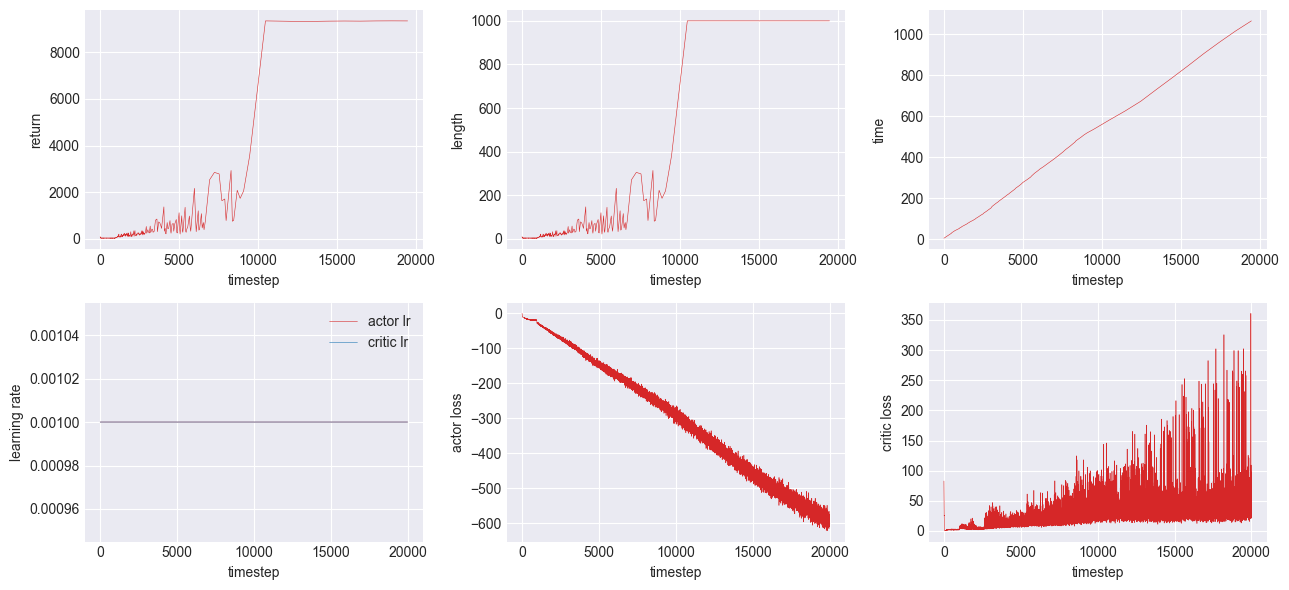

In [2]:
ENV_ID = 'InvertedDoublePendulum-v4'
train_env = make_vec_env(ENV_ID, n_envs=1)

model = DDPG(train_env)

from IPython.display import clear_output
def draw() :
    clear_output()
    plot(model.logger)
macro = MacroCallback(n_steps=500, f=draw)

model.train(total_timesteps=20000, callback=macro)

train_env.close()

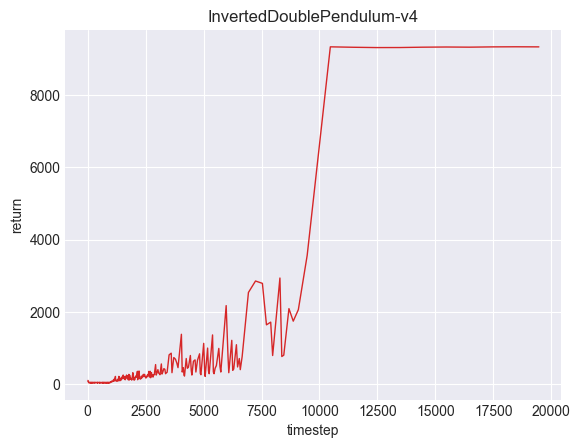

In [6]:
import matplotlib.pyplot as plt

x, y = model.logger.get('episode/r', window=1)

plt.style.use('seaborn-v0_8-darkgrid')
plt.plot(x, y, color='tab:red', linewidth=1.0)
plt.title(ENV_ID)
plt.xlabel('timestep')
plt.ylabel('return')
plt.show()

In [3]:
eval_env = make_vec_env(ENV_ID, n_envs=8)
mean, std = evaluate_policy(
    model=model,
    env=eval_env,
    n_eval_episodes=64
)
eval_env.close()

print('| mean %6.1f | std: %5.1f |'%(mean, std))

| mean 9342.7 | std:   0.2 |


In [4]:
from stable_baselines3.common.vec_env import VecVideoRecorder

record_env = make_vec_env(ENV_ID, n_envs=1, env_kwargs=dict(render_mode='rgb_array'))
record_env = VecVideoRecorder(
    venv=record_env,
    video_folder='./videos/',
    record_video_trigger=lambda x: x==0,
    video_length=1000,
    name_prefix='InvertedDoublePendulum-ddpg'
)

evaluate_policy(
    model=model,
    env=record_env,
    n_eval_episodes=1,
    deterministic=True
)
record_env.close()

Saving video to c:\Users\gram15\workspace\projects\Simple-RL\examples\videos\InvertedDoublePendulum-ddpg-step-0-to-step-1000.mp4
Moviepy - Building video c:\Users\gram15\workspace\projects\Simple-RL\examples\videos\InvertedDoublePendulum-ddpg-step-0-to-step-1000.mp4.
Moviepy - Writing video c:\Users\gram15\workspace\projects\Simple-RL\examples\videos\InvertedDoublePendulum-ddpg-step-0-to-step-1000.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\gram15\workspace\projects\Simple-RL\examples\videos\InvertedDoublePendulum-ddpg-step-0-to-step-1000.mp4
